In [1]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from utils import *

plt.style.use('ggplot')

In [13]:
data_URL = 'https://www.ssb.no/statbank/sq/10085910'

data = import_salmon_data(data_URL, correct_dt=False)

# Change index to datetime format
date_series = pd.to_datetime(data['uke'].str[:4] + data['uke'].str[-2:] + '1', format='%Y%W%w')
data['ds'] = date_series
data.drop('uke', axis=1, inplace=True)

price_data = data[['ds', 'Kilopris (kr)']].rename(columns={'Kilopris (kr)':'y'})
export_data = data[['ds', 'Vekt (tonn)']].rename(columns={'Vekt (tonn)':'y'})

price_data['cap'] = 120.0


In [38]:
price_train, price_test = train_test_split(price_data, test_size=0.25, shuffle=False)
export_train, export_test = train_test_split(export_data, test_size=0.25, shuffle=False)

price_model = Prophet(growth='logistic', seasonality_mode='multiplicative')
price_model.fit(price_train)

export_model = Prophet(seasonality_mode='multiplicative', seasonality_prior_scale=50)
export_model.fit(export_train)

price_forecast = price_model.predict(price_test)
export_forecast = export_model.predict(export_test)


12:05:21 - cmdstanpy - INFO - Chain [1] start processing
12:05:21 - cmdstanpy - INFO - Chain [1] done processing
12:05:21 - cmdstanpy - INFO - Chain [1] start processing
12:05:21 - cmdstanpy - INFO - Chain [1] done processing


## Testing model validity

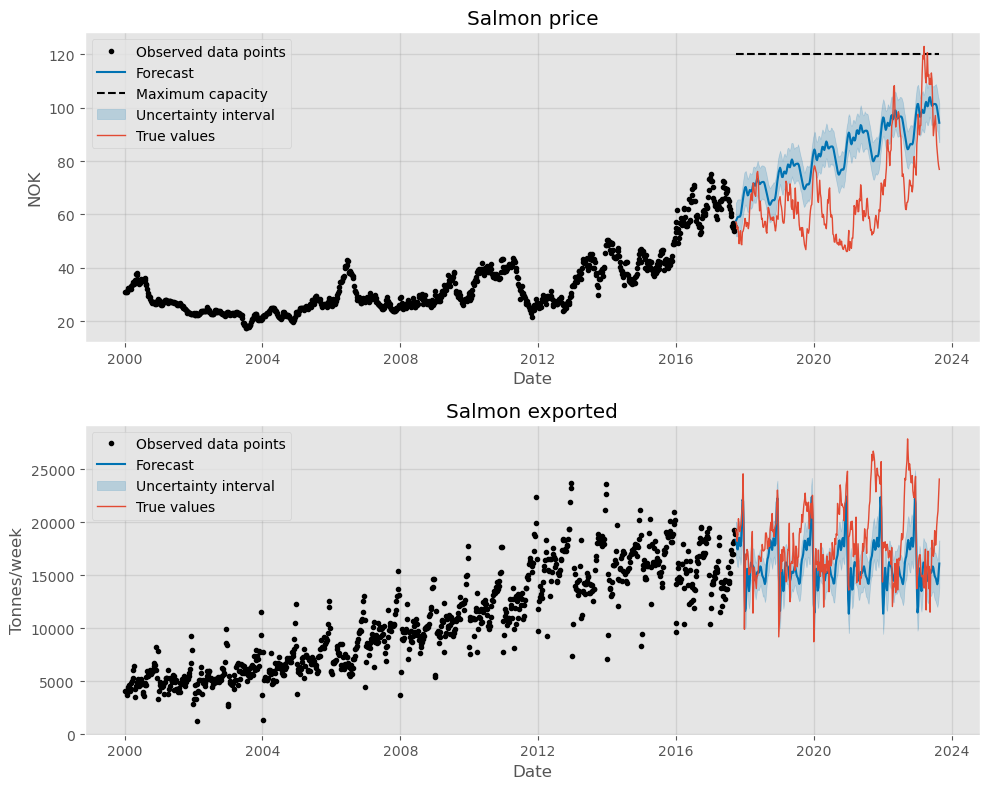

In [39]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
price_model.plot(price_forecast, ax=ax1)
ax1.plot(price_test['ds'], price_test['y'], label='True values', linewidth=1)

ax1.set_title('Salmon price')
ax1.set_xlabel('Date')
ax1.set_ylabel('NOK')
ax1.legend()

export_model.plot(export_forecast, ax=ax2)
ax2.plot(export_test['ds'], export_test['y'], label='True values', linewidth=1)

ax2.set_title('Salmon exported')
ax2.set_xlabel('Date')
ax2.set_ylabel('Tonnes/week')
ax2.legend()

fig.tight_layout();

## Future forecast

12:08:49 - cmdstanpy - INFO - Chain [1] start processing
12:08:49 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1291,2023-10-23,85.767902,71.328333,90.888566,85.767902,85.767902,-4.397468,-4.397468,-4.397468,-4.397468,-4.397468,-4.397468,0.0,0.0,0.0,81.370434


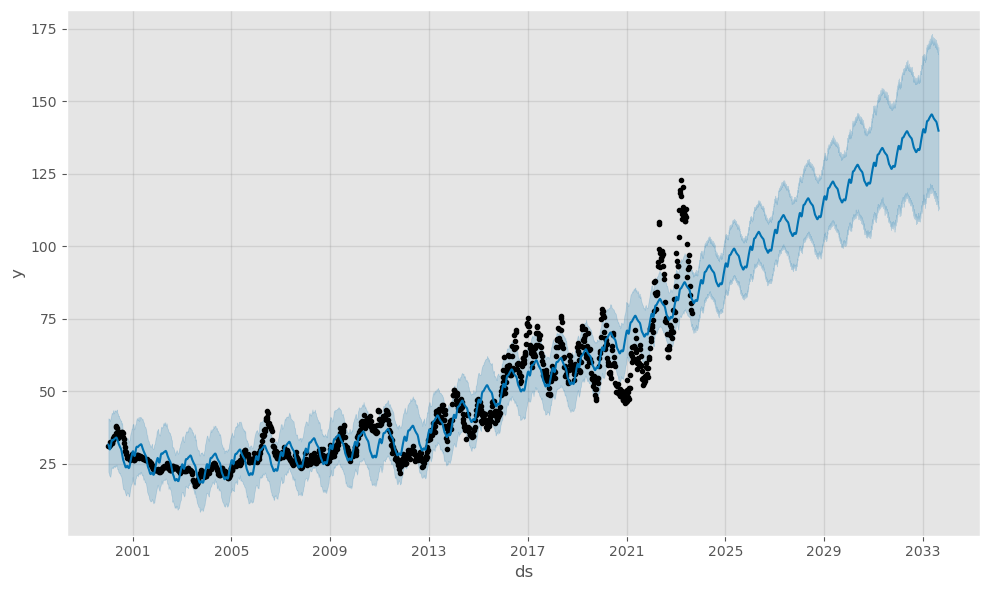

In [42]:
price_model = Prophet()
price_model.fit(price_data)
price_future = price_model.make_future_dataframe(periods=365*10)
price_forecast = price_model.predict(price_future)
fig = price_model.plot(price_forecast)

pred = price_forecast[price_forecast['ds'] == '2023-10-23']

display(pred)